# **MONTE CARLO METHODS AND FINITE-SIZE ANALYSIS IN PARAMAGNETIC-FERROMAGNETIC MODELS OF PHASE TRANSITION**

Authors:
* Carlo Divari
* Gloria Isotton
* Maryam Feizi
* Sara Munafò

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **INTRODUCTION**

In [ ]:
#introduction

In [ ]:
#ising

In [ ]:
#metropolis 

In [ ]:
#blablabla

# **SIMULATION OF A 2D ISING MODEL**

In [47]:
#define variables of the model
L=25            #dimension of the lattice
time_f=40 #total time of the mc simulation 40
T=2              # temperature in KbT unit
J=1              #spin spin interaction
kb = 1         # Boltzmann const
step=1       # Monte Carlo steps parameter
realiz=10     # number of Monte Carlo means
nt=30        #number of temperatures points
T_c = 2/np.log(1 + np.sqrt(2)) #analytic critical temperature                

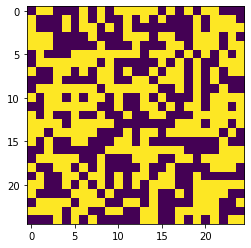

In [3]:
#Create a nxn lattice with random spin configuration
def init_lattice(n):
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice
s=init_lattice(L)

#show the lattice as an image (1 spin= 1 pixel)
plt.imshow(s)
plt.show()

In [4]:
#define pbc
def bc(i):
    if i>L-1: return 0
    if i<0: return L-1
    else:
        return i

In [5]:
#Let's define some useful functions

def energy(state):
    
    '''define the energy at a given configuration'''
    
    N = state.shape[0]
    energy = 0
  
    for i in range(N):
        for j in range(N):

      # get nearest neighbours states
            nn = state[bc(i-1), j] + state[bc(i+1), j] + state[i, bc(j-1)] + state[i, bc(j+1)]
            energy +=  -state[i,j] * nn
    return energy / 4
    
    
def magnetization(state,L):
    
    '''define the magnetization per site'''
    
    Magn = np.sum(state)/(L*L)    
    return Magn


def delta(s,a,b):
    
    '''define delta E between 2 spin configurations'''

    return 2*s[a][b]*(s[a][int(bc(b+1))]+s[a][int(bc(b-1))]+s[int(bc(a+1))][b]+s[int(bc(a-1))][b])   #consider only nearest neighbours

def mean_of_last_5(arr):
    return sum(arr[-5:]) / 5


# **PHASE TRANSITION ANALYSIS**

In [6]:
# Define Monte Carlo function
def mc_step(s,temp,step):
    
    L=int(s.shape[0])
    for i in range(int(L*L/step)):
        
        # choose a random spin on the grid
        a, b =np.random.randint(0,L), np.random.randint(0,L)
        
        # compute the delta energy before and after the flip of s(a,b)
        delta_E=delta(s,a,b)  

        # metropolis test and spin-flip
        if delta_E <= 0 or np.random.uniform(0, 1) < np.exp(-delta_E/temp):
            s[int(bc(a)),int(bc(b))]=-s[int(bc(a)),int(bc(b))]
    return s

In [48]:
# Do the simulation using the mc_step function previously defined

# Define arrays to store state observables
E,M,C,Chi = np.zeros(nt),np.zeros(nt),np.zeros(nt),np.zeros(nt)
Te = np.linspace(1.,7.,nt)
    
#loop of equilibration
for i in range(nt):
    T = Te[i]
    print(i)
    magnetizations=np.zeros(time_f)
    energies=np.zeros(time_f)
        
    for r in range(0,realiz):
        s=np.ones((L,L))
            
        for t in range(0,time_f):
            m=magnetization(s,L)
            magnetizations[t]=magnetizations[t]+m/realiz
            energies[t]=energies[t]+energy(s)/realiz
            s=mc_step(s, T, step)

    #print(energies/(L*L))
    #M[i]=sum(magnetizations[-10:])/10
    M[i]=np.mean(magnetizations)
    E[i]=np.mean(energies)/(L*L)
    C[i] = pow(np.std(energies),2)/(pow(L,2)*pow(T,2))
    Chi[i] = pow(np.std(magnetizations),2)/(pow(L,2)*T)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [49]:
def plot_values (Te,E,M,C,Chi,L):
    titles=['Energy','Magnetisation','Specific Heat','Susceptibility']
    physical_quantities=[E,M,C,Chi]
    col_map = np.array(["navy", "red", "green", "orange"])
    plt.figure(figsize=(16,10))
    for i in range(len(physical_quantities)):
        ax=plt.subplot(2,2,i+1)
        ax.set_xlabel('Temperature', fontsize=18)
        ax.set_ylabel(titles[i], fontsize=18)
        ax.set_title(titles[i], fontsize = 20, fontweight = "bold" )
        ax.grid('--', alpha= 0.7)
        ax.plot(Te, physical_quantities[i], '.',markersize=7, label=titles[i], alpha=0.7,color=col_map[i])
        ax.legend()
            
    plt.subplots_adjust(hspace=0.3)

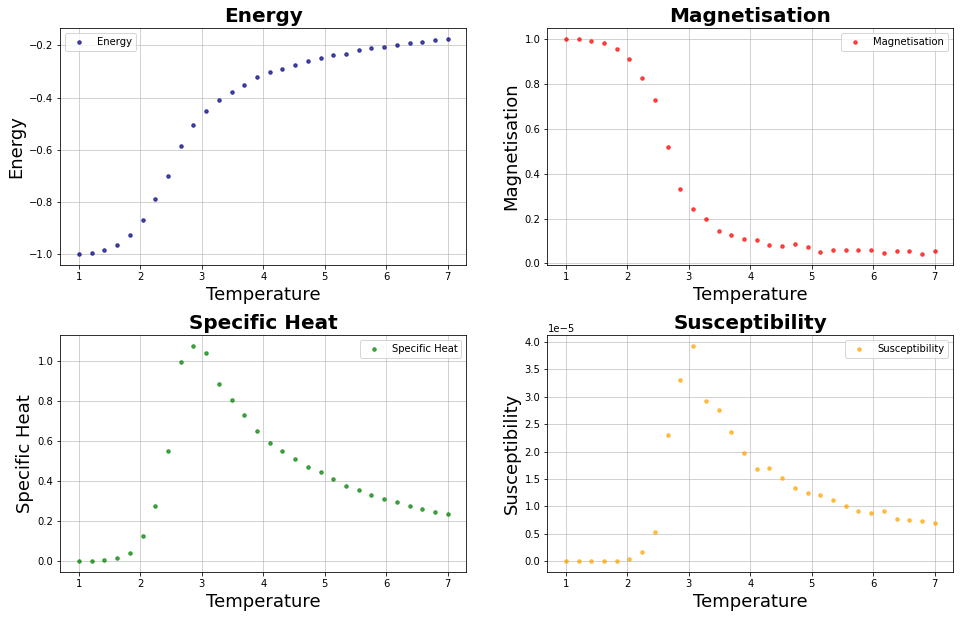

In [50]:
Te = np.linspace(1.,7.,nt)
plot_values(Te,E,M,C,Chi,L)

# **Equilibrazione (temp)**

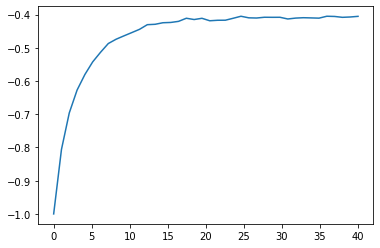

In [8]:
Te = [1,2,3,4,5,6,7]
time_f=40
realiz=100
time=np.linspace(0,time_f,time_f)

T=Te[2]
mag=np.zeros(time_f)
ene=np.zeros(time_f)
for r in range(0,realiz):
    s=np.ones((L,L))  #ground state
    for t in range(0,time_f):
        m=magnetization(s,L)
        mag[t]=mag[t]+m/realiz
        ene[t]=ene[t]+energy(s)/realiz
        mc_step(s, T, step)
plt.plot(time,ene/(L*L))
plt.show()

In [12]:
print(sum(ene[-10:])/(10*L*L))

-0.4084704


# **PREVIOUS CODE (working)**

In [117]:
E = np.zeros(nt)
M = np.zeros(nt)
C = np.zeros(nt)
Chi = np.zeros(nt)
Te = np.linspace(1.,7.,nt)
    
for i in range(len(Te)):
    T=Te[i]
    mag=np.zeros(time_f)
    ene=np.zeros(time_f)
    for r in range(0,realiz):
        s=np.ones((L,L))  #ground state
        for t in range(0,time_f):
            m=magnetization(s,L)
            mag[t]=mag[t]+m/realiz
            ene[t]=ene[t]+energy(s)/realiz
            mc_step(s, T, step)

    #keep trace of energy and magnetisation
    M[i]=mag[time_f-1]
    E[i]=np.mean(ene,axis=0)/(L*L)
    C[i] = pow(np.std(ene),2)/(pow(L,2)*pow(T,2))
    Chi[i] = pow(np.std(mag),2)/(pow(L,2)*T)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
